In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['class label','Alcohol','Malic Acid']

In [11]:
df.head()

,class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Alcohol', ylabel='Density'>

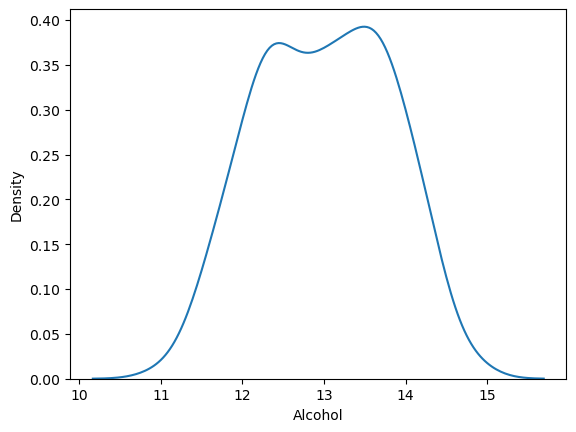

In [12]:
sns.kdeplot(df['Alcohol'])

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Malic Acid', ylabel='Density'>

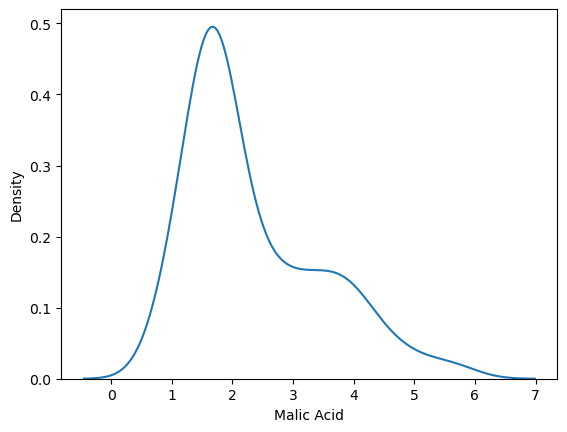

In [13]:
sns.kdeplot(df['Malic Acid'])

In [14]:
color_dict={1:'red',2:'blue',3:'green'}

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

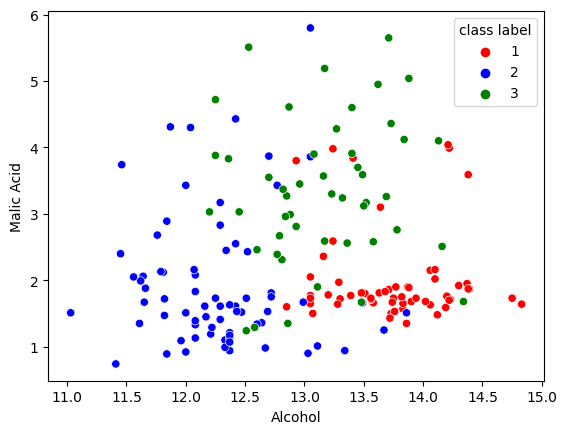

In [19]:
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['class label'],palette=color_dict)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('class label',axis=1),
                                              df['class label'],
                                              test_size=0.3,
                                              random_state=0)

X_train.shape,X_test.shape

((124, 2), (54, 2))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

#fit the scalar  to the train set,it will learn the paramters
scalar.fit(X_train)

#tranform  train and test data
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)



In [28]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


##### below is min and max of actual data before scalling
- the min is 11 and .9 
- the max is 14.8 and 5.6

In [29]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


##### xcaled data - impact of min max scalar, the range is [0,1]
- min is 0 and max is 1

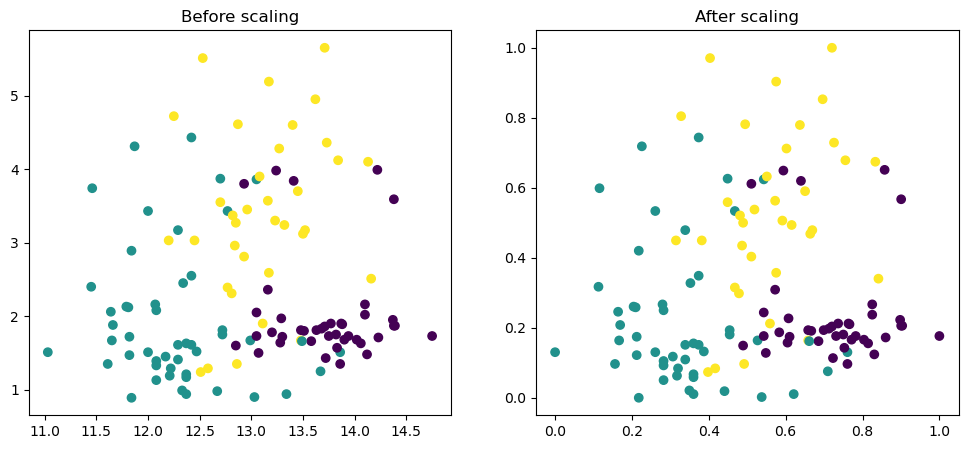

In [33]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x=X_train['Alcohol'],y=X_train['Malic Acid'],c=y_train)
ax1.set_title('Before scaling')
ax2.scatter(x=X_train_scaled['Alcohol'],y=X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title('After scaling')

plt.show()

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: xlabel='Alcohol', ylabel='Density'>

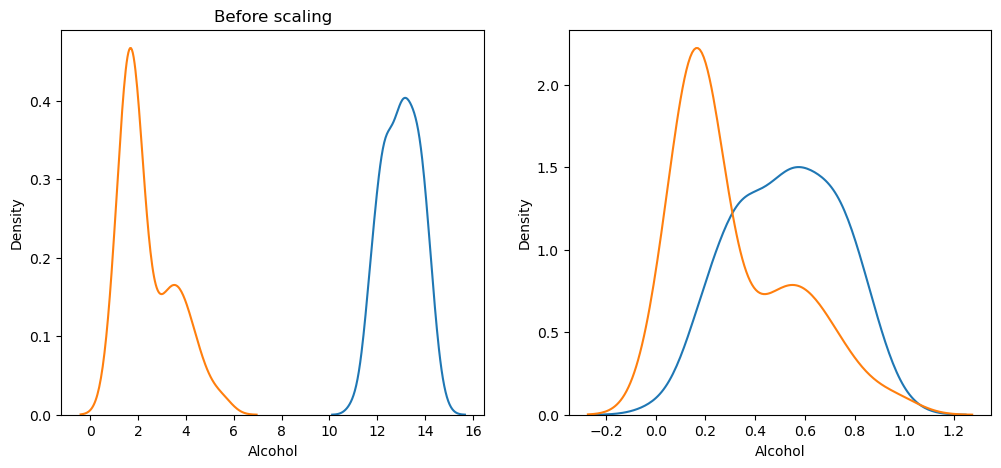

In [36]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling')

sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)


ax1.set_title('Before scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)

#### we could also check the distribution of the data as after MinMaxScaling the distribution might change